<a href="https://colab.research.google.com/github/hfarruda/deeplearningtutorial/blob/master/deepLearning_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feedforward networks

This example is part of the [*Deep Learning Tutorial*](https://github.com/hfarruda/deeplearningtutorial), authored by Henrique F. de Arruda, Alexandre Benatti, César Comin, and Luciano da Fontoura Costa.  These codes are not suitable for other data and/or applications, which will require modifications in the structure and parameters. These codes have absolutely no warranty. 

If you publish a paper related on this material, please cite:

H. F. de Arruda, A. Benatti, C. H. Comin, L.  da  F.  Costa,  "Learning Deep Learning (CDT-15)," 2019.

## Binary Classification
This is the first example of deep learning implementation, in which we address binary classification of wine data. In this example, we consider one feedforward network with 5 hidden layers and with 30 neurons in each layer.  The provided networks were built only for didactic purposes and are not appropriate for real applications.

First of all, we import the necessary libraries. Here we opt for using Keras (using TensorFlow backend).

In [ ]:
%tensorflow_version 1.x
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model
from keras.models import model_from_json
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

TensorFlow 1.x selected.


Using TensorFlow backend.


If you have a GPU, you can use the following code to allocate processing into it.  Otherwise, proceed to (*).

In [ ]:
import tensorflow as tf 
from keras import backend as K

print(K.tensorflow_backend._get_available_gpus())

number_of_cpu_cores = 8
config = tf.ConfigProto(device_count = {'GPU': 1 , 'CPU': number_of_cpu_cores}) 
session = tf.Session(config=config) 
keras.backend.set_session(session)

['/job:localhost/replica:0/task:0/device:GPU:0']



Here, we use the Wine dataset. It is available at Sklearn library on [sklearn-datasets-wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). For more information [wine-UCI](https://archive.ics.uci.edu/ml/datasets/Wine).
Because this dataset comprises three classes and here we exemplify a binary classification, we considered only the two first classes.



In [ ]:
wine = load_wine()
data = wine['data']
target = wine['target']
target_names = wine['target_names'] 

#The selected items are stored in the variable called "hold".
hold = np.argwhere(target!=2).T[0]
data = data[hold]
target = target[hold]
target_names = target_names[0:1]

#Here, we divide our dataset into training and test sets.
test_size = 0.25 #fraction 
training_data,test_data,training_target,test_target = train_test_split(data, 
                                                    target, test_size=test_size)



In the following, we configure the neuronal network. It is not necessary to include bias because this parameter is set as true by default. 




In [ ]:
#Set of parameters
input_dim = data.shape[1]
kernel_initializer = 'random_uniform'
bias_initializer='zeros'
activation_function_hidden = 'relu'
activation_function_output = 'sigmoid'
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics = ['binary_accuracy']
number_of_layers = 5
number_of_units_hidden = 30
number_of_units_output = 1
dropout_percentage = 0.25


#Creating model
ff_model = Sequential()
ff_model.add(Dense(units = number_of_units_hidden, 
                   activation = activation_function_hidden, 
                   kernel_initializer = kernel_initializer, 
                   input_dim = input_dim))

for i in range(number_of_layers-1):
    #Inserting a dense hidden layer
    ff_model.add(Dense(units = number_of_units_hidden, 
                       activation = activation_function_hidden, 
                       kernel_initializer = kernel_initializer, 
                       input_dim = number_of_units_hidden))
    #Inserting dropout
    ff_model.add(Dropout(dropout_percentage))

ff_model.add(Dense(units = number_of_units_output, 
                   activation = activation_function_output))
ff_model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In order to check the network topology, you can use the subsequent command.

In [ ]:
ff_model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)               


Another option is to visualize the topology as a figure. 

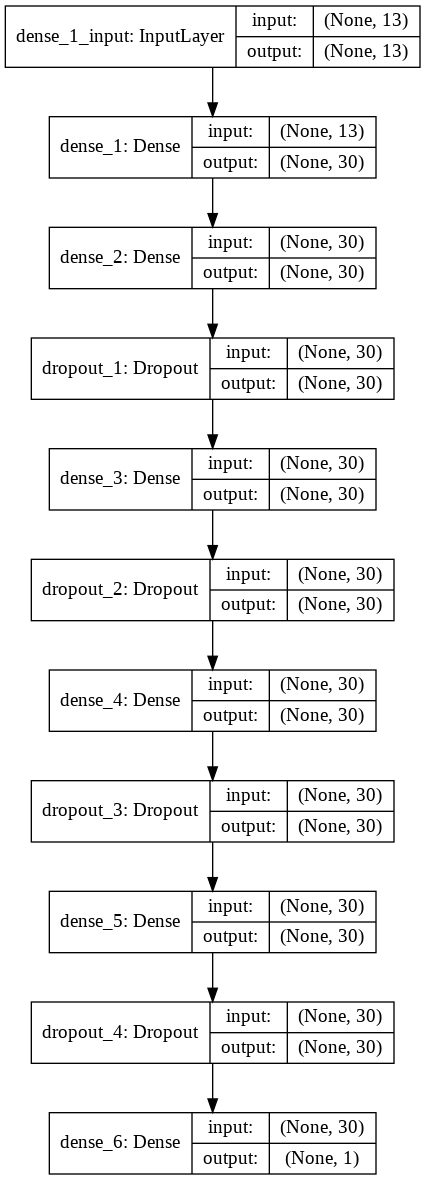

In [ ]:
#Saving the resultant figure as 'ff_model.png'.
plot_model(ff_model, to_file='ff_model.png', show_shapes=True, 
           show_layer_names=True)

Next, we train the network

In [ ]:
batch_size = 10
epochs = 200
ff_model.fit(training_data,training_target, batch_size = batch_size, 
             epochs = epochs)


Epoch 1/200
97/97 [==============================] - 0s 5ms/step - loss: 0.6929 - binary_accuracy: 0.4330
Epoch 2/200
97/97 [==============================] - 0s 610us/step - loss: 0.6894 - binary_accuracy: 0.5361
Epoch 3/200
97/97 [==============================] - 0s 557us/step - loss: 0.6757 - binary_accuracy: 0.5155
Epoch 4/200
97/97 [==============================] - 0s 546us/step - loss: 0.6641 - binary_accuracy: 0.4433
Epoch 5/200
97/97 [==============================] - 0s 594us/step - loss: 0.6534 - binary_accuracy: 0.4433
Epoch 6/200
97/97 [==============================] - 0s 550us/step - loss: 0.6195 - binary_accuracy: 0.6082
Epoch 7/200
97/97 [==============================] - 0s 580us/step - loss: 0.5860 - binary_accuracy: 0.6701
Epoch 8/200
97/97 [==============================] - 0s 616us/step - loss: 0.5574 - binary_accuracy: 0.7732
Epoch 9/200
97/97 [==============================] - 0s 526us/step - loss: 0.5186 - binary_accuracy: 0.7732
Epoch 10/200
97/97 [=========

In order to create an application, it is possible to save the network and the respective trained weights as follows.



In [ ]:
#Saving the network model
ff_model_json = ff_model.to_json()
with open('ff_model.json', 'w') as file:
    file.write(ff_model_json)

#Saving weights
ff_model.save_weights('ff_model.h5')

There are different analysis that can account for the quality of the results. Here, we consider only the measurement of accuracy. 

In [ ]:
predictions = ff_model.predict(test_data)
#Because it is a binary classification, we consider the values higher than 0.5 
#as being part of class 1 otherwise 0.
predictions = (predictions > 0.5)
accuracy = accuracy_score(test_target, predictions)
print("Accuracy =", accuracy)

Accuracy = 0.8787878787878788


In this tutorial we only present a simple example of the neuronal network use. However, for a real application, it is necessary to consider a more elaborate analysis of the results, e.g., using a k-fold technique. 

##Multiclass Classification
In this example, we illustrate a multiclass classification through a wine dataset, in which there are three classes, which were defined according to their regions. We employed the same dataset presented above, but here we considered the three classes. To do so, we use the *softmax* activation function.

First of all, we import the necessary libraries. Here we opt for using Keras (using TensorFlow backend).

In [ ]:
%tensorflow_version 1.x
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

If you have a GPU, you can use the following code to allocate processing into it.  Otherwise, proceed to (*).

In [ ]:
import tensorflow as tf 
from keras import backend as K

print(K.tensorflow_backend._get_available_gpus())

number_of_cpu_cores = 8
config = tf.ConfigProto(device_count = {'GPU': 1 , 'CPU': number_of_cpu_cores}) 
session = tf.Session(config=config) 
keras.backend.set_session(session)

['/job:localhost/replica:0/task:0/device:GPU:0']


(*) In this example the dataset used is Wine. It is available at Sklearn library on [sklearn-datasets-wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). For more information [wine-UCI](https://archive.ics.uci.edu/ml/datasets/Wine).

These data show the results of a chemical analysis of wines grown in Italy, derived from three different cultivars in the same region, and can be loaded as follows.

In [ ]:
wine = load_wine()
data = wine['data']
target = wine['target']
target_names = wine['target_names'] 

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)
target_one_hot_encoding = np_utils.to_categorical(target)

#Here, we divide our dataset into training and test sets.
test_size = 0.25 #fraction 
training_data,test_data,training_target,test_target = train_test_split(data, 
                                  target_one_hot_encoding, test_size=test_size)


In the following, we configure the neuronal network. It is not necessary to include bias because this parameter is set as true by default. 



In [ ]:
#Set of parameters
input_dim = data.shape[1]
kernel_initializer = 'random_uniform'
bias_initializer='zeros'
activation_function_hidden = 'relu'
activation_function_output = 'softmax'
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['categorical_accuracy']
number_of_layers = 5
number_of_units_hidden = 30
number_of_units_output = len(set(target_names))
dropout_percentage = 0.25


#Creating model
ff_model = Sequential()
ff_model.add(Dense(units = number_of_units_hidden, 
                   activation = activation_function_hidden, 
                   kernel_initializer = kernel_initializer, 
                   input_dim = input_dim))

for i in range(number_of_layers-1):
  #Inserting a dense hidden layer
  ff_model.add(Dense(units = number_of_units_hidden, 
                     activation = activation_function_hidden, 
                     kernel_initializer = kernel_initializer, 
                     input_dim = number_of_units_hidden))
  #Inserting dropout
  ff_model.add(Dropout(dropout_percentage))

ff_model.add(Dense(units = number_of_units_output, 
                   activation = activation_function_output))
ff_model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
ff_model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_7 (Dropout)          (None, 30)               

The training step is executed as follows.

In [ ]:
batch_size = 10
epochs = 250
ff_model.fit(training_data,training_target, batch_size = batch_size,
             epochs = epochs)

Epoch 1/250
133/133 [==============================] - 1s 5ms/step - loss: 1.0979 - categorical_accuracy: 0.3684
Epoch 2/250
133/133 [==============================] - 0s 1ms/step - loss: 1.0946 - categorical_accuracy: 0.4812
Epoch 3/250
133/133 [==============================] - 0s 865us/step - loss: 1.0823 - categorical_accuracy: 0.3835
Epoch 4/250
133/133 [==============================] - 0s 902us/step - loss: 1.0456 - categorical_accuracy: 0.3459
Epoch 5/250
133/133 [==============================] - 0s 978us/step - loss: 1.0382 - categorical_accuracy: 0.3684
Epoch 6/250
133/133 [==============================] - 0s 913us/step - loss: 1.0318 - categorical_accuracy: 0.5038
Epoch 7/250
133/133 [==============================] - 0s 966us/step - loss: 0.9899 - categorical_accuracy: 0.5188
Epoch 8/250
133/133 [==============================] - 0s 897us/step - loss: 0.9491 - categorical_accuracy: 0.5714
Epoch 9/250
133/133 [==============================] - 0s 1ms/step - loss: 0.9196 - 

Because there are three classes, we show the classification results through a confusion matrix.

In [ ]:
predictions = ff_model.predict(test_data)

found_target = predictions.argmax(axis=1)
categorical_test_target = test_target.argmax(axis=1)

accuracy = accuracy_score(categorical_test_target, found_target)
print("Accuracy =", accuracy)

print("Confusion matrix:")
matrix = confusion_matrix(found_target,categorical_test_target)
print(matrix)

Accuracy = 0.9555555555555556
Confusion matrix:
[[17  1  0]
 [ 1 17  0]
 [ 0  0  9]]


## License

This Deep Learning Tutorial is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 (CC BY-NC-ND 4.0) International License.

## Acknowledgments
Henrique F. de Arruda acknowledges FAPESP for sponsorship (grant no. 2018/10489-0). H. F. de Arruda also thanks Soremartec S.A. and Soremartec Italia, Ferrero Group, for partial financial support (from 1st July 2021). His funders had no role in study design, data collection, and analysis, decision to publish, or manuscript preparation. Alexandre Benatti thanks Coordenação de Aperfeiçoamento de Pessoal de Nível Superior - Brasil (CAPES) - Finance Code 001. Luciano da F. Costa thanks CNPq (grant no. 307085/2018-0) and FAPESP (proc. 15/22308-2) for sponsorship. César H. Comin thanks FAPESP (Grant Nos. 2018/09125-4 and 2021/12354-8) for financial support. This work has been supported also by FAPESP grants 11/50761-2 and 15/22308-2.